<a href="https://colab.research.google.com/github/9M3a1h3d9i9/karatsuba-VS-Normal-Mul/blob/main/K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **In the name of GOD**

The Project of **Design and Analysing for Algorithms** , Subject of project is Analysiation of Multiplication Third grade algorithm O(n3) VS Multiplicaion KURATSUBA algorithms.


**Master Names:** Dr.M.SALAHI

**Student Names:** Mohammad Mahdi Shafighi

**Field of Study:**  Computer Science

**Academic year:** 1402

**Gilan University**


# Imports

In [ ]:
import timeit
import random
import math
import matplotlib.pyplot as plt
import numpy as np

# Create a Random numbers

In [ ]:
l1, l2, tl1, tl2 = list(), list(), list(), list()
for i in range(1000):
  for j in range(10**i,(10**i+1)):
    l1.append(random.randint(0,j)*random.randint(0,j))
    l2.append(random.randint(0,j)*random.randint(0,j))

# **Normal Multiplication**

In [ ]:
def Multiplication(x, y):
  return x * y

# third grade algorithm O(n^3)

In [ ]:
import functools


def counted(fn):
    # Counter Decorator
    def wrapper(*args, **kwargs):
        if "" in args or " " in args:
            return "".join(map(lambda s: s.strip(), args))
        wrapper.called += 1
        return fn(*args, **kwargs)
    wrapper.called = 0
    wrapper.__name__ = fn.__name__
    return wrapper


@counted
def prod(x, y):
    # x, y are strings --> returns a string of x*y
    return str(eval("%s * %s" % (x, y)))


@counted
def suma(x, y):
    # x, y are strings --> returns a string of x+y
    return str(eval("%s + %s" % (x, y)))


def one_to_n_product(d, x):
    """d is a single digit, x is n-digit --> returns a string of d*x
    """
    result = ""
    carry = "0"
    for i, digit in enumerate(reversed(x)):
        r = suma(prod(d, digit), carry)
        carry, digit = r[:-1], r[-1]
        result = digit + result
    return carry + result


def sum_middle_products(middle_products):
    # middle_products is a list of strings --> returns a string
    max_length = max([len(md) for md in middle_products])
    for i, md in enumerate(middle_products):
        middle_products[i] = " " * (max_length - len(md)) + md
    carry = "0"
    result = ""
    for i in range(1, max_length + 1):
        row = [carry] + [md[-i] for md in middle_products]
        r = functools.reduce(suma, row)
        carry, digit = r[:-1], r[-1]
        result = digit + result
    return carry + result


def algorithm(x, y):
    # x, y are integers --> returns an integer, x*y
    x, y = str(x), str(y)
    middle_products = []
    for i, digit in enumerate(reversed(y)):
        middle_products.append(one_to_n_product(digit, x) + " " * i)
    return int(sum_middle_products(middle_products))

# ***Karatsuba Recursive Algorithms***

In [ ]:
def karatsuba(x, y):
    if x < 10 or y < 10:
        return x * y
    else:
        n = max(len(str(x)), len(str(y)))
        half = n // 2
        a = x // (10 ** (half))  # left part of x
        b = x % (10 ** (half))  # right part of x
        c = y // (10 ** (half))  # left part of y
        d = y % (10 ** (half))  # right part of y
        ac = karatsuba(a, c)
        bd = karatsuba(b, d)
        ad_plus_bc = karatsuba(a+b, c+d)-ac-bd
        return ac * (10 ** (2 * half)) + (ad_plus_bc * (10 ** half)) + bd

# Time Calculating

In [ ]:
for i in range(len(l1)):
  starting_time = timeit.default_timer()
  karatsuba(l1[i],l2[i])
  # print("time difference:", timeit.default_timer()-starting_time)
  ending_time = timeit.default_timer()
  tl1.append(ending_time - starting_time)
print(tl1)
print(len(tl1))

[2.6300001536583295e-06, 7.480000022042077e-06, 1.2029999879814568e-05, 3.0130000141070923e-05, 5.136000004313246e-05, 5.9129999954166124e-05, 0.00013175000003684545, 0.0001248099999884289, 0.00016661999984535214, 0.00019161000000167405, 0.00027903000000151224, 0.00026823999996850034, 0.00036748000002262415, 0.00035851999996339146, 0.00042054999994434183, 0.0004697099998338672, 0.0005033200000070792, 0.0007838300000457821, 0.0005466499999329244, 0.000527700000020559, 0.0006911999998919782, 0.0007610399998156936, 0.0008962700001120538, 0.0008401400000366266, 0.0009347000000161643, 0.0009754989998782548, 0.0007511500000418891, 0.0007974400000421156, 0.0008270410000932316, 0.0009082199999284057, 0.0009666200000992831, 0.0009888310000860656, 0.0011042000000998087, 0.0011543200000687648, 0.0011733700000604586, 0.0014071200000671524, 0.0014433400001507835, 0.0016213700000662357, 0.0014734100000168837, 0.0016247100002146908, 0.0018800799998643924, 0.0017943599998488935, 0.0017018789999383444,

In [ ]:
for j in range(len(l1)):
  starting_time = timeit.default_timer()

  algorithm(l1[j], l2[j])

  ending_time = timeit.default_timer()
  tl2.append(ending_time - starting_time)
print(tl2)
print(len(tl2))

In [ ]:
x1, x2 = [], []
for i in range(len(tl1)):
  x1.append(i)
for j in range(len(tl2)):
  x2.append(j)

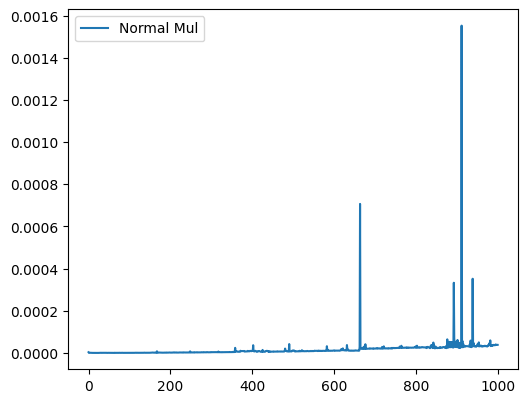

In [ ]:
 fig = plt.figure(figsize=(5,4), dpi=100)
 axes = fig.add_axes( [0.1, 0.1, 0.9, 0.9] )

axes.plot(x1, tl1, label="Karatsuba")
axes.plot(x2, tl2, label="Normal Mul")

axes.legend(loc=0)

plt.show()
